In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
import jax.numpy as jnp
import numpy as np
import numpyro
from reusable.util import load_args
from plotting.paper import get_trained_draws_from_args, get_training_histories_from_args, plot_training_histories, plot_trained_draws
from plotting.helpers import pretty_prior
from plotting.scores import show

In [58]:
code = 27
name = 1
disambig = 1

args = load_args(code, disambig, name)

hists = []

titles = []

for index in range(len(args["length_priors"]) * len(args["variance_priors"]) * len(args["gp_kernels"])):

    length_index, variance_index, gp_kernel_index = jnp.unravel_index(
        index, (len(args["length_priors"]), len(args["variance_priors"]), len(args["gp_kernels"]))
    )

    args.update(args["length_priors"][length_index])

    args.update(args["variance_priors"][variance_index])

    args["gp_kernel"] = args["gp_kernels"][gp_kernel_index]

    titles.append(
        "$\ell$: "
        + pretty_prior(args["length_prior_choice"], args["length_prior_arguments"])
        + ", $v$: "
        + pretty_prior(args["variance_prior_choice"], args["variance_prior_arguments"])
        + " kernel: "
        + args["gp_kernel"].__name__
    )

    hists = hists + get_training_histories_from_args(args, "B")[0]


In [59]:
titles

['$\\ell$: $\\mathrm{InverseGamma}(1, 1)$, $v$: $\\mathrm{Gamma}(5, 0.25)$ kernel: esq_kernel',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$, $v$: $\\mathrm{Gamma}(5, 0.25)$ kernel: func',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$, $v$: $\\|\\mathcal{N}(0, 1)\\|$ kernel: esq_kernel',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$, $v$: $\\|\\mathcal{N}(0, 1)\\|$ kernel: func',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$, $v$: $\\mathcal{U}(2, 12)$ kernel: esq_kernel',
 '$\\ell$: $\\mathrm{InverseGamma}(1, 1)$, $v$: $\\mathcal{U}(2, 12)$ kernel: func',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$, $v$: $\\mathrm{Gamma}(5, 0.25)$ kernel: esq_kernel',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$, $v$: $\\mathrm{Gamma}(5, 0.25)$ kernel: func',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$, $v$: $\\|\\mathcal{N}(0, 1)\\|$ kernel: esq_kernel',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$, $v$: $\\|\\mathcal{N}(0, 1)\\|$ kernel: func',
 '$\\ell$: $\\log\\mathcal{N}(0, 1)$, $v$: $\\mathcal{U}(2, 12)$ kernel: esq_kernel',
 '$\\ell$: $\\

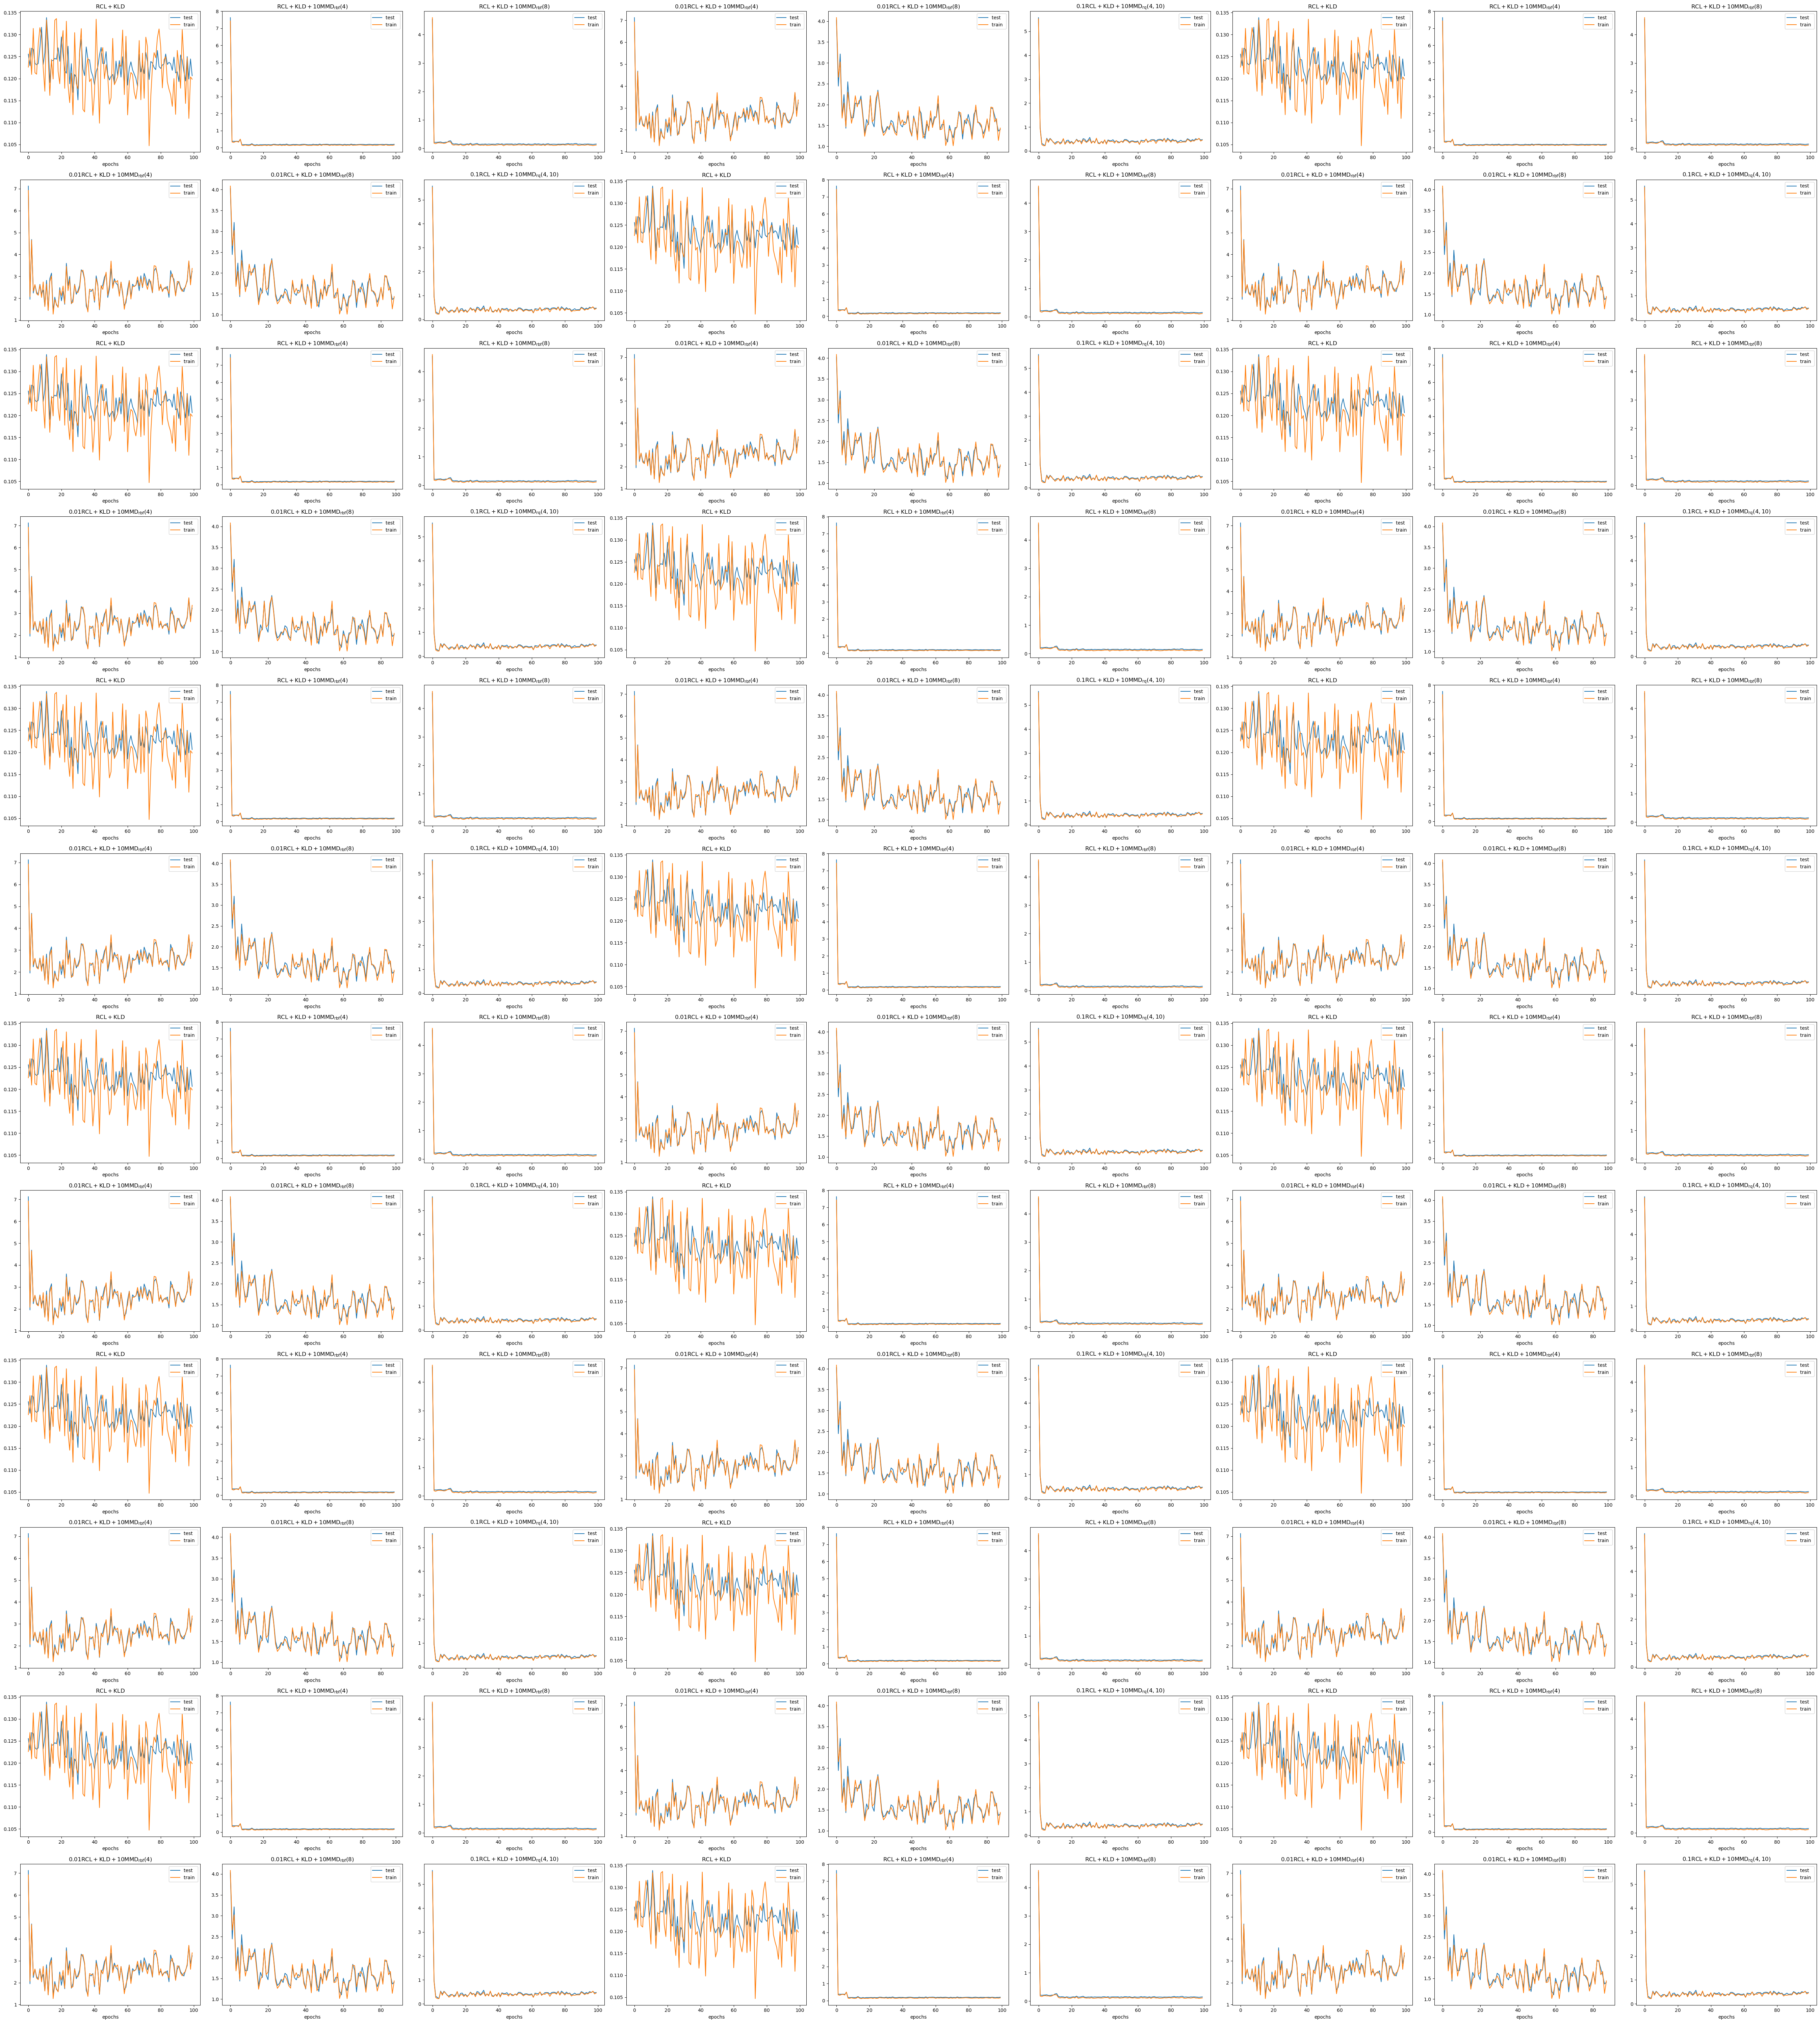

In [9]:
plot_training_histories(hists, f"{code}/{code}_{name}_{disambig}", 12, 9)

In [63]:

draws = []

for index in range(len(args["length_priors"]) * len(args["variance_priors"]) * len(args["gp_kernels"])):



    length_index, variance_index, gp_kernel_index = jnp.unravel_index(
        index, (len(args["length_priors"]), len(args["variance_priors"]), len(args["gp_kernels"]))
    )


    args.update(args["length_priors"][length_index])

    args.update(args["variance_priors"][variance_index])

    args["gp_kernel"] = args["gp_kernels"][gp_kernel_index]

    new = get_trained_draws_from_args( args, "B", include_gp=True)[0]
    new[0] = (new[0][0],  new[0][1] + " " + titles[index])

    draws = draws + new


Mean 20.0 Variance 80.0
Mean 20.0 Variance 80.0
Mean 0.7978845 Variance 0.3633802276324186
Mean 0.7978845 Variance 0.3633802276324186
Mean 7.0 Variance 8.333333333333334
Mean 7.0 Variance 8.333333333333334
Mean 20.0 Variance 80.0
Mean 20.0 Variance 80.0
Mean 0.7978845 Variance 0.3633802276324186
Mean 0.7978845 Variance 0.3633802276324186
Mean 7.0 Variance 8.333333333333334
Mean 7.0 Variance 8.333333333333334
Mean 20.0 Variance 80.0
Mean 20.0 Variance 80.0
Mean 0.7978845 Variance 0.3633802276324186
Mean 0.7978845 Variance 0.3633802276324186
Mean 7.0 Variance 8.333333333333334
Mean 7.0 Variance 8.333333333333334


In [65]:
bounds = jnp.array([jnp.mean(numpyro.diagnostics.hpdi(x[0]), axis=1) * jnp.array([1.2,1.2]) for x in draws[::7]])

WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING! all draws were NaN for title $0.01\mathrm{RCL}+\mathrm{KLD}+10\mathrm{MMD}_\mathrm{rbf}(8)$, ylabel $y=f_{VAE}(x)$
WARNING!

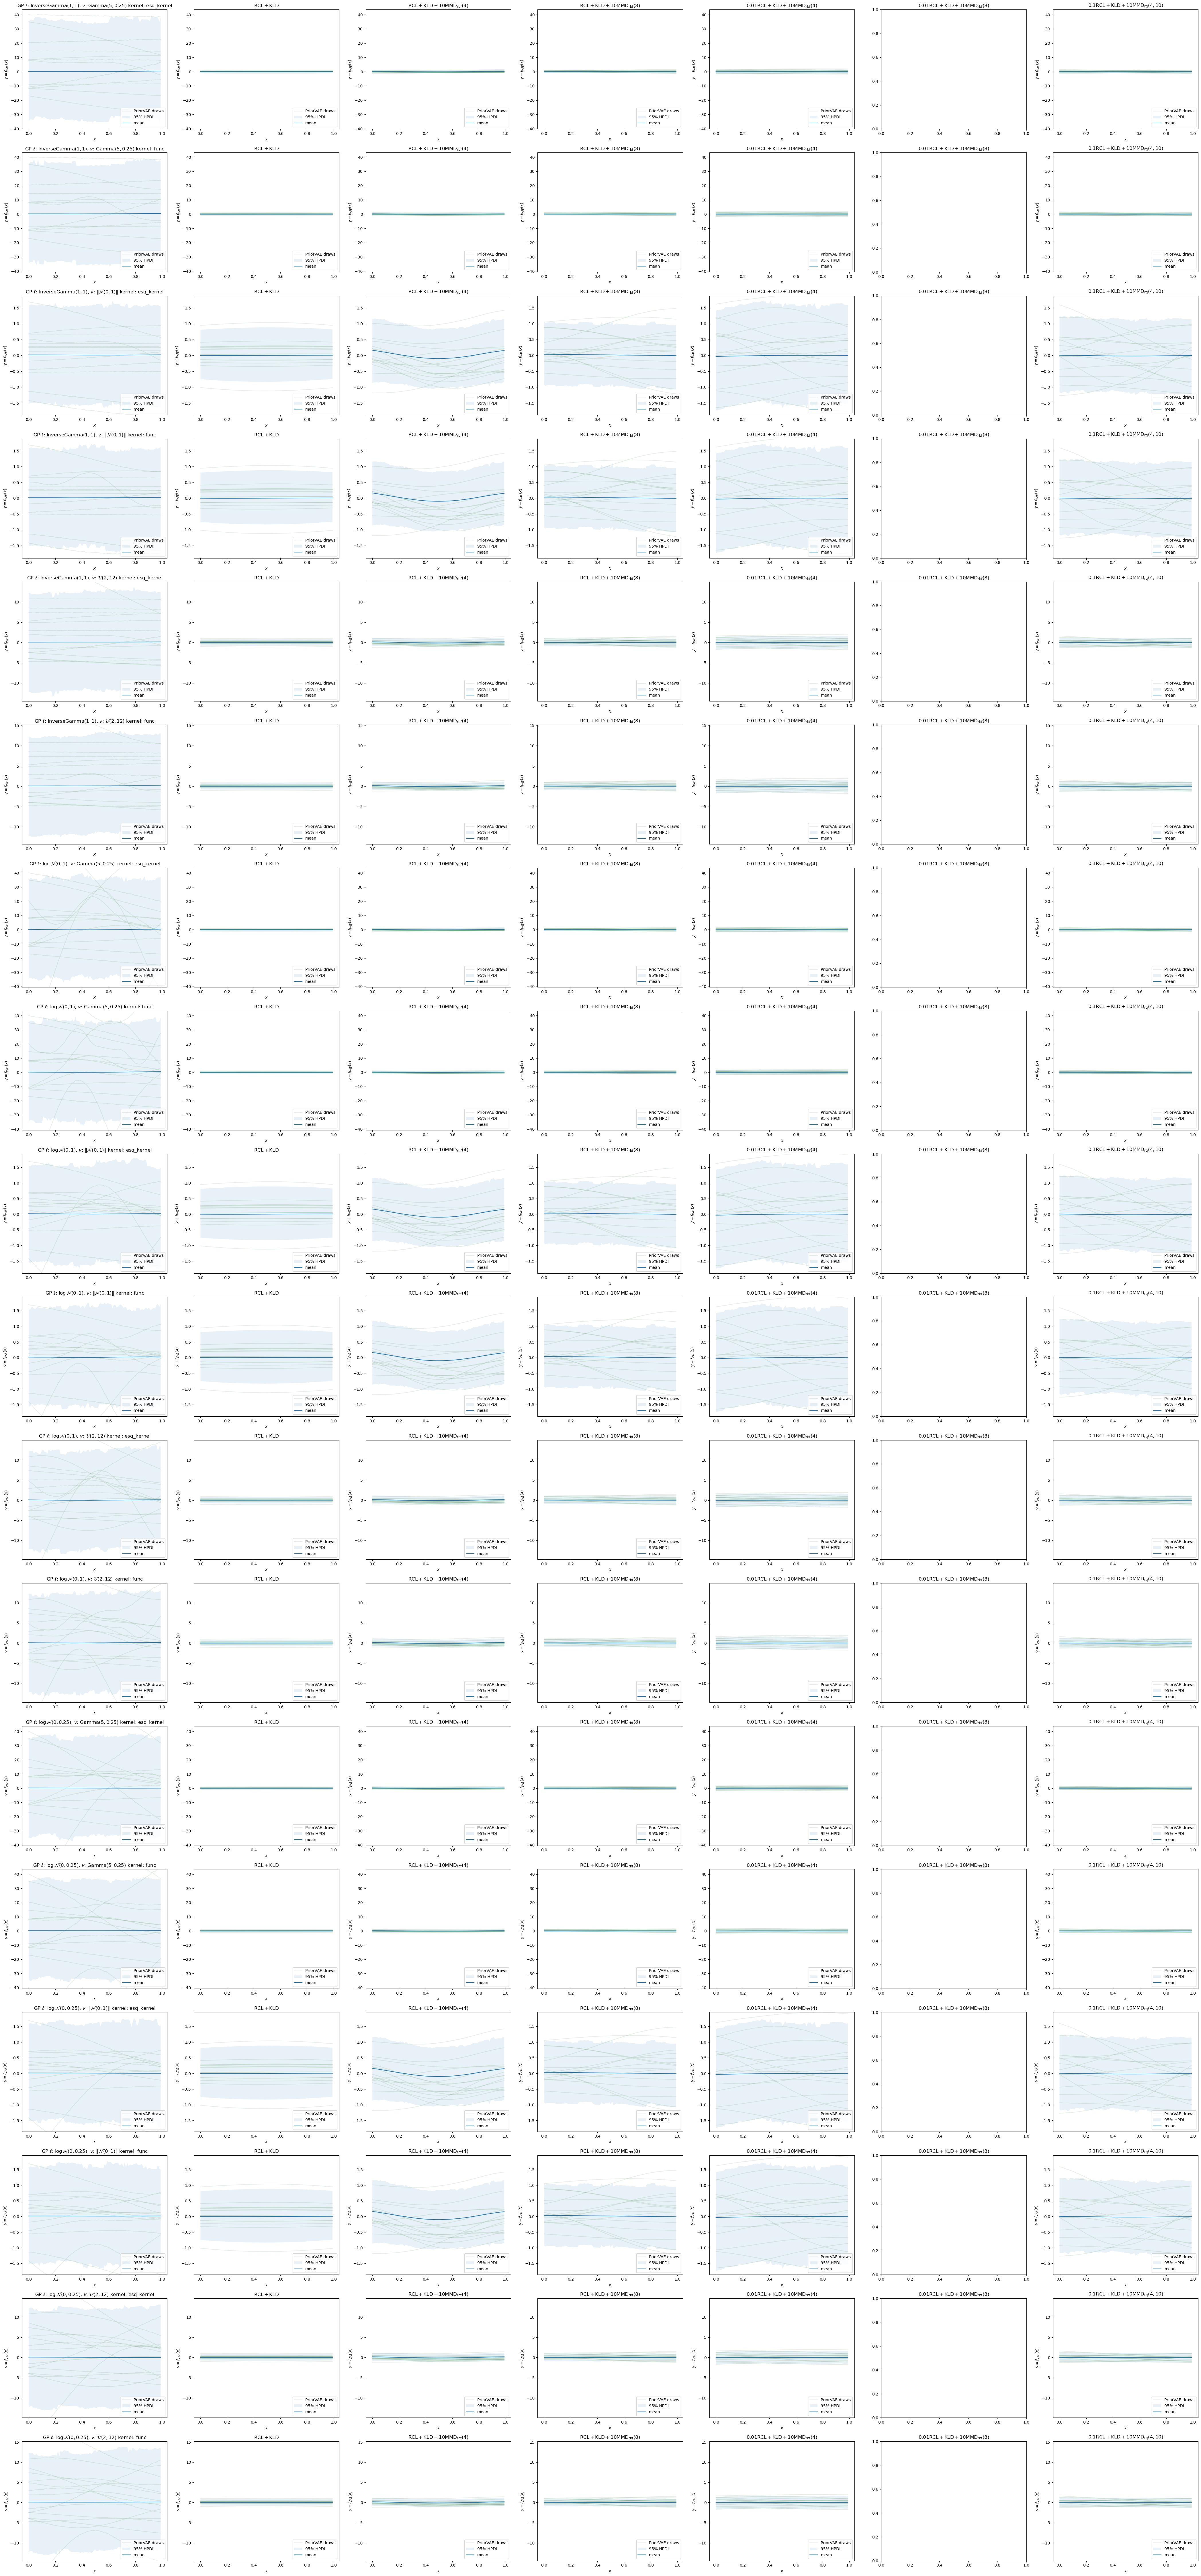

In [66]:
plot_trained_draws(draws, args["x"], 7, 18,  f"{code}/{code}_{name}_{disambig}", backfill="align_right", plot_range= list(zip(np.repeat(bounds[:,0], 7), np.repeat(bounds[:,1], 7))))

In [67]:
show_loss_scores(27, 1, 1)

NameError: name 'show_loss_scores' is not defined